In [3]:
#First let's import the necessary library.
%matplotlib inline
from Compare import Compare
from functools import reduce
from json import dumps
import os
#import mpld3
from collections import defaultdict
#mpld3.enable_notebook()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy

#x = Compare({"happy": ["ecstatic", "bursting", "nostalgic"], "sad": ["down", "depressed", "nostalgic"]}, LABEL_BOTH_FACTORS=True)


In [4]:
path = "assembled/"

def processCollection (path):
    #initialise vars:
    urls = []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename)
            urls.append(list({(filename[0:10], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1]) for line in file.readlines()}))
    return(urls)

#newdict = defaultdict(dict)
newdict = defaultdict(lambda: defaultdict(list))
PC = processCollection(path)
#print(list(zip(PC[0])))
#print(list(zip(PC[0][0])))
#print (**collect)
for collect in PC:
    for coll, date, url in collect:
        newdict[date][coll].append(url)
        
#print({x for x in newdict.values()})
 

elxn42-all.txt
health_sciences_grey_literature-all.txt
canadian_business_grey_literature-all.txt
web_archive_general-all.txt
alberta_floods_2013-all.txt
heritage_community_foundation-all.txt
hcf_alberta_online_encyclopedia-all.txt
alberta_education_curriculum-all.txt
alberta_oil_sands-all.txt
humanities_computing-all.txt
idle_no_more-all-urls.txt
ottawa_shooting_october_2014-all.txt
energy_environment-all.txt
prarie_provinces-all.txt
canadian_political_parties.txt
lfrancophonie_de_louest_canadien-all.txt


['health_sci', 'web_archiv', 'alberta_ed', 'prarie_pro', 'hcf_albert', 'heritage_c']
[  2.46788991e-01   1.88119255e-01   1.36278583e-01   9.38047661e-02
   2.17994245e-04]


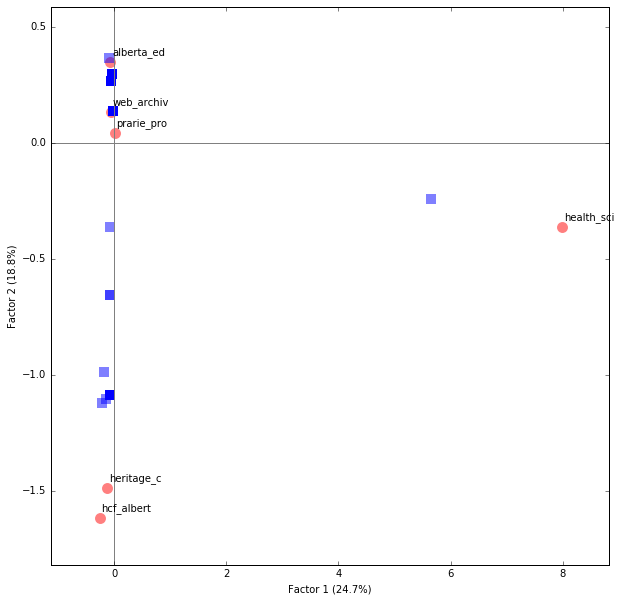

In [4]:
Compare({**newdict['2010'], **newdict['2011'], **newdict['2012']})



In [5]:


def process_dict_tree(dictionary, minvalue=2):
    treelist = []
    currdate = []
    for date, d in sorted(dictionary.items()):
        if currdate:
            print ("true")
            treelist.append({**d, **currdate})
        else:
            print(len(treelist))
            if (len(treelist)+1) < minvalue:
                treelist.append(d)
                #print(treelist)
            elif (len(treelist) +1) == minvalue:
                #print(treelist)
                currdate = reduce(lambda x,y: {**x,**y}, treelist)
                treelist.append(currdate)
                print ("first currdate is " + str(currdate))
            else:
                currdate = treelist[-1]
                treelist.append(d)
                print ("next currdate is " + str(currdate))
    print(treelist)
process_dict_tree(TestDict, 2)

            
        
    

NameError: name 'TestDict' is not defined

In [ ]:
TestDict1 = {'2009': {'c1': {'lk1', 'lk2', 'lk3'},
                     'c2': {'lk1', 'lk10', 'lk20', 'lk2'},
                     'c3': {'lk3', 'lk10', 'lk33', 'lk4'}},
            '2010': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c3': {'lk10', 'lk9', 'lk7'}},
            '2011': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c4': {'lk1', 'lk2', 'lk3'}},
            '2012': {'c1': {'lk1', 'lk99', 'lk6'}}
           }

#print(list(zip(*zip(TestDict['2009'])))

In [15]:
print(TestDict1['2012'])

{'c1': {'lk6', 'lk99', 'lk1'}}


In [6]:
def add_two_collections (col1, col2):
    col_1 = col1.copy()
    for coll, values in col2.items():
        #print(values)
        try:
            col_1[coll] = set(col_1[coll])
            col_1[coll].update(set(values)) 
            col_1[coll] = list(col_1[coll])
        except KeyError:
            col_1[coll] = list(values)       
    return col_1
#print(add_two_collections(newdict['2012'], newdict['2011']))
#Compare(add_two_collections(newdict['2012'], newdict['2013']))
   

    

In [14]:
def reduce_collections (dictionary):
    dict_list = []
    fulllist = {}
    dict2 = copy.deepcopy(dictionary)
    for x, y in sorted(dict2.items()):
        print(x)
        n = dictionary.pop(x)
        if len(dict_list) < 1:
            dict_list.append(n)
        #print(n)
        else:
            dict_list.append((add_two_collections(dict_list[-1], n)))
        #print(dict_list)
    return(dict_list)

zonk = reduce_collections (copy.deepcopy(newdict))

2009
2010
2011
2012
2013
2014
2015
2016


In [130]:
x = [{"x": 'booga'}]
print (x[-1])

{'x': 'booga'}


['ottawa_sho', 'energy_env', 'health_sci', 'web_archiv', 'alberta_oi', 'lfrancopho', 'humanities', 'alberta_ed', 'prarie_pro', 'heritage_c', 'hcf_albert', 'canadian_p', 'canadian_b', 'alberta_fl', 'elxn42-all', 'idle_no_mo']
[ 0.55086173  0.23215102  0.13260752  0.10464154  0.099032    0.09474068
  0.08538812  0.06760101  0.05240888  0.04726495  0.04513444  0.04483788
  0.03771518  0.02541464  0.00140993]


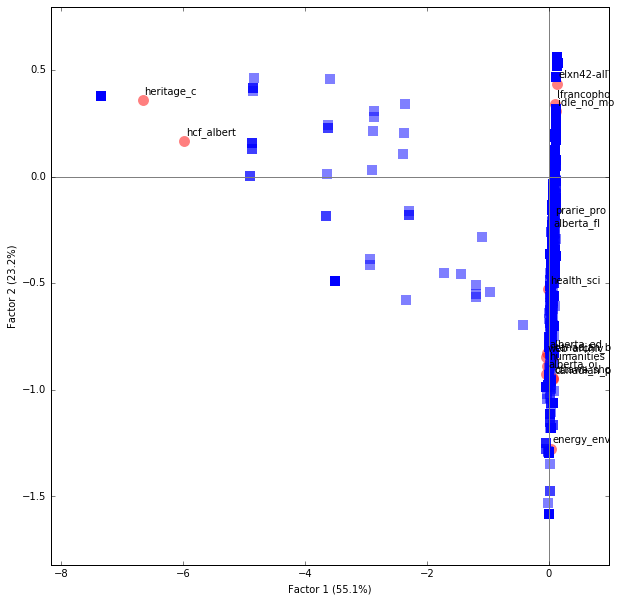

In [8]:
Compare(zonk[-1])

['ottawa_sho', 'lfrancopho', 'health_sci', 'web_archiv', 'alberta_oi', 'canadian_b', 'humanities', 'alberta_ed', 'prarie_pro', 'hcf_albert', 'heritage_c', 'canadian_p', 'energy_env', 'alberta_fl', 'idle_no_mo']
[ 0.56532201  0.20030506  0.13657695  0.11118823  0.10627593  0.09837199
  0.07781063  0.05862401  0.05205987  0.04915481  0.0473014   0.03864853
  0.01640551  0.00140401]


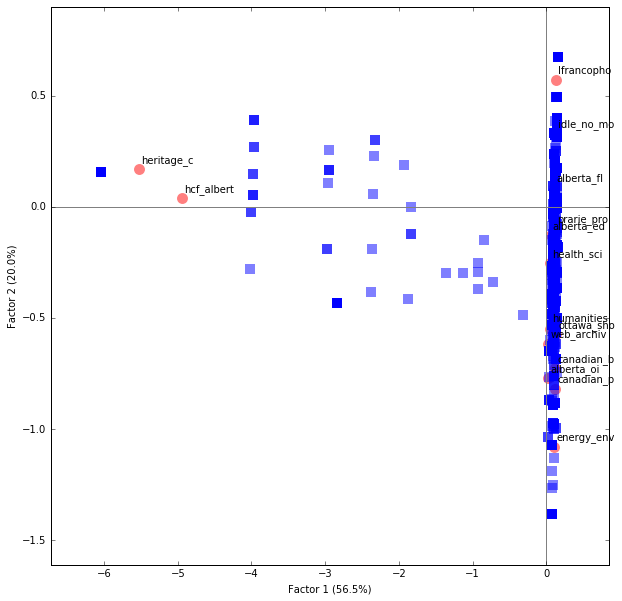

In [9]:
Compare(zonk[-2])

['ottawa_sho', 'energy_env', 'health_sci', 'web_archiv', 'alberta_oi', 'canadian_b', 'humanities', 'alberta_ed', 'prarie_pro', 'heritage_c', 'hcf_albert', 'lfrancopho', 'alberta_fl', 'idle_no_mo']
[ 0.58870746  0.17215     0.13639221  0.13017334  0.10206459  0.08423177
  0.0718817   0.06380811  0.05449886  0.04995321  0.03334442  0.01004939
  0.00140684]


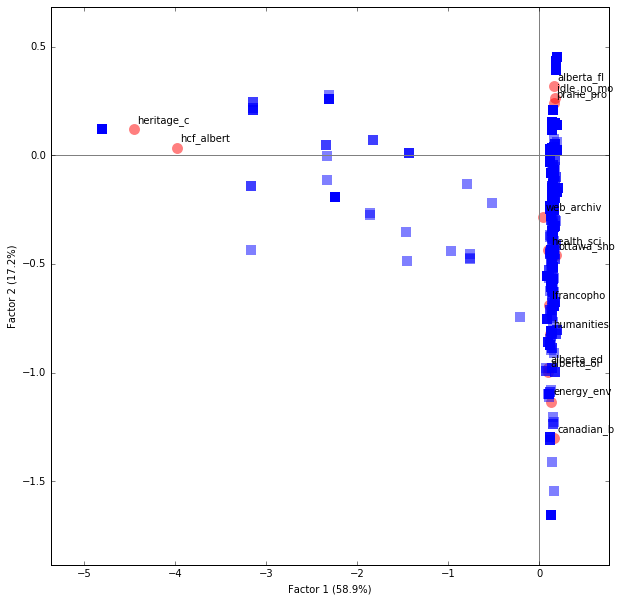

In [10]:
Compare(zonk[-3])

['health_sci', 'canadian_b', 'web_archiv', 'lfrancopho', 'humanities', 'alberta_ed', 'prarie_pro', 'hcf_albert', 'heritage_c', 'energy_env', 'alberta_fl', 'idle_no_mo']
[ 0.60931131  0.20610759  0.12868428  0.09836565  0.09495652  0.07634843
  0.05603693  0.02743457  0.02093711  0.00477479  0.00126161]


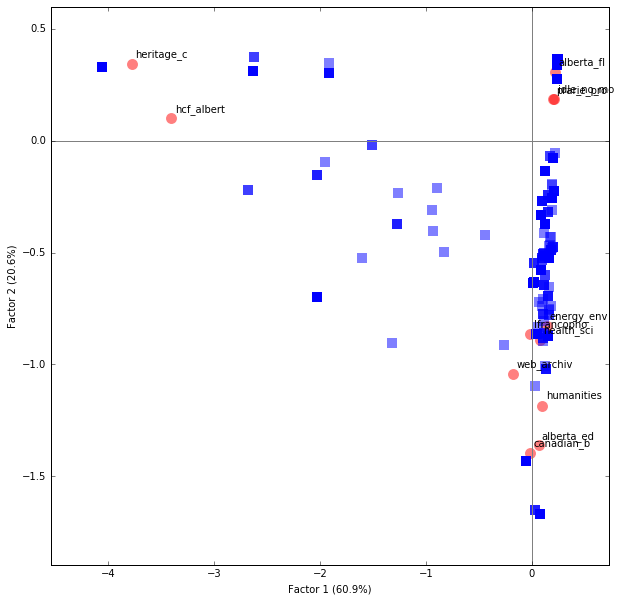

In [11]:
Compare(zonk[-4])

['alberta_ed', 'prarie_pro', 'health_sci', 'hcf_albert', 'heritage_c', 'web_archiv']
[ 0.68950133  0.24750168  0.14032739  0.00103307]


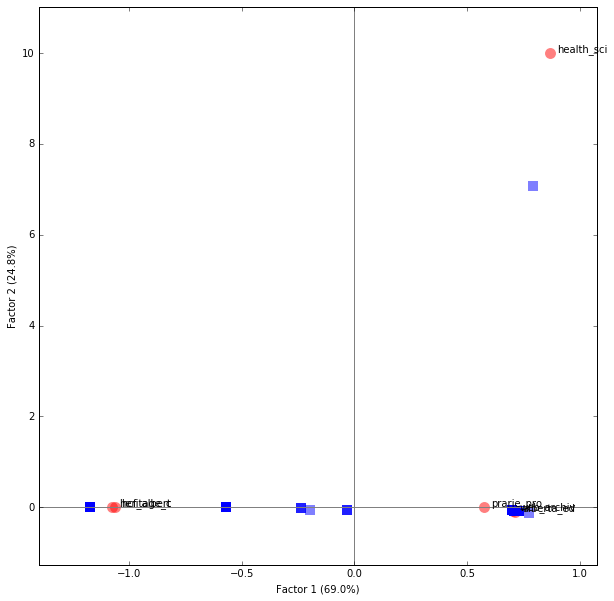

In [12]:
Compare(zonk[-5])

In [13]:
Compare(zonk[-6])

['heritage_c', 'alberta_ed', 'prarie_pro', 'hcf_albert']


ValueError: array must not contain infs or NaNs